In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
idx = 241

data_path = Path('F:/isee_dataset/12673/input/').glob('*.npz')
data_path = sorted(data_path)

label_path = Path('F:/isee_dataset/12673/label/').glob('*.npz')
label_path = sorted(label_path)

print(data_path[idx].name)
print(label_path[idx].name)

input_12673_20170906_090000.npz
label_12673_20170906_090000.npz


In [3]:
labels = np.load(label_path[idx])

In [4]:
labels.keys()

KeysView(NpzFile 'F:\\isee_dataset\\12673\\label\\label_12673_20170906_090000.npz' with keys: label, pot, x, y, z)

In [5]:
b = labels['label']
b = b[:, :-1, :-1, :-1]
b = np.clip(b, -6000, 6000)
b.shape

(3, 512, 256, 256)

In [6]:
inputs = b[:, :, :, 0]
inputs.shape

(3, 512, 256)

In [7]:
print(inputs[0].max(), inputs[0].min())
print(inputs[1].max(), inputs[1].min())
print(inputs[2].max(), inputs[2].min())

6000.0 -5991.439
6000.0 -6000.0
3266.9666 -6000.0


In [8]:
bx_norm = np.max(np.abs(inputs[0]))
by_norm = np.max(np.abs(inputs[1]))
bz_norm = np.max(np.abs(inputs[2]))

print(bx_norm, by_norm, bz_norm)

6000.0 6000.0 6000.0


In [9]:
bx = b[0]
by = b[1]
bz = b[2]

In [25]:
bx_min = np.min(bx, axis=(0, 1))
bx_max = np.max(bx, axis=(0, 1))
bx_median = np.median(bx, axis=(0, 1))

by_min = np.min(by, axis=(0, 1))
by_max = np.max(by, axis=(0, 1))
by_median = np.median(by, axis=(0, 1))

bz_min = np.min(bz, axis=(0, 1))
bz_max = np.max(bz, axis=(0, 1))
bz_median = np.median(bz, axis=(0, 1))

In [29]:
z = np.arange(256)

Optimized parameters:
a = 1.0364836064879945
t = 1.504204678441121


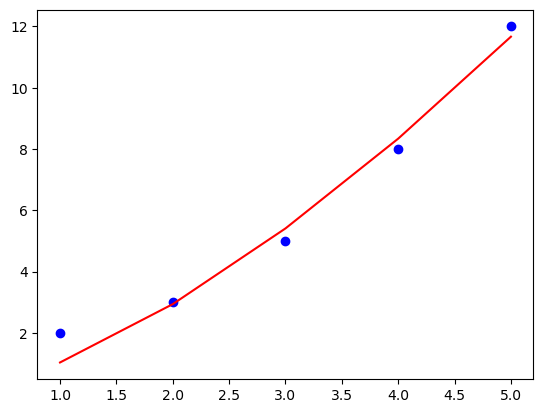

In [33]:
from scipy.optimize import curve_fit

def power_law(x, a, t):
    return a * np.power(x, t)

# Generate some sample data
x_data = np.array([1, 2, 3, 4, 5])
y_data = np.array([2, 3, 5, 8, 12])

# Fit the model to the data
popt, pcov = curve_fit(power_law, x_data, y_data)

# popt contains the optimized values for the parameters (a and t)
a_opt, t_opt = popt

print("Optimized parameters:")
print("a =", a_opt)
print("t =", t_opt)

plt.plot(x_data, y_data, "bo", label="Sample Data")
plt.plot(x_data, power_law(x_data, a_opt, t_opt), "r-", label="Fitted Curve")

Optimized parameters:
m = 0.028122608341064913
c = -5222.505874304045
c0 = 6013.188369282914


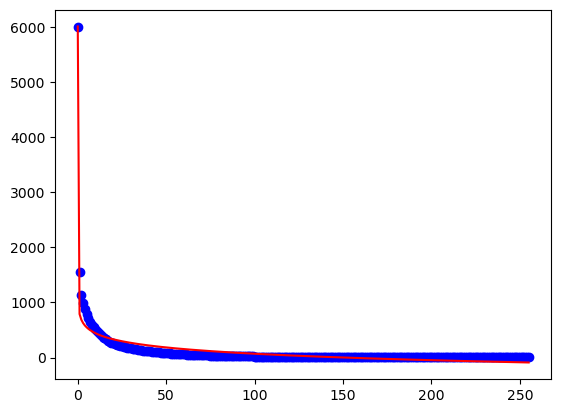

In [41]:
from scipy.optimize import curve_fit

def power_law(x, m, c, c0):
    return c0 + c * np.power(x, m)

# Generate some sample data
x_data = np.arange(256)
y_data = bx_max

# Fit the model to the data
popt, pcov = curve_fit(power_law, x_data, y_data)

# popt contains the optimized values for the parameters (a and t)
m_opt, c_opt, c0_opt = popt

print("Optimized parameters:")
print("m =", m_opt)
print("c =", c_opt)
print("c0 =", c0_opt)

plt.plot(x_data, y_data, "bo", label="Sample Data")
plt.plot(x_data, power_law(x_data, m_opt, c_opt, c0_opt), "r-", label="Fitted Curve")

Optimized parameters:
m = 0.04940590204224508
c = 4737.358904705785
c0 = -6067.364777846289


C:\Users\user\AppData\Local\Temp\ipykernel_10404\2433227835.py:4: RuntimeWarning: divide by zero encountered in power
  return c0 + c * np.power(x, m)


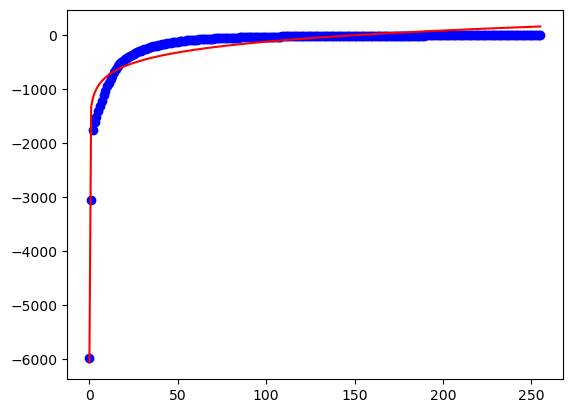

In [42]:
from scipy.optimize import curve_fit

def power_law(x, m, c, c0):
    return c0 + c * np.power(x, m)

# Generate some sample data
x_data = np.arange(256)
y_data = bx_min

# Fit the model to the data
popt, pcov = curve_fit(power_law, x_data, y_data)

# popt contains the optimized values for the parameters (a and t)
m_opt, c_opt, c0_opt = popt

print("Optimized parameters:")
print("m =", m_opt)
print("c =", c_opt)
print("c0 =", c0_opt)

plt.plot(x_data, y_data, "bo", label="Sample Data")
plt.plot(x_data, power_law(x_data, m_opt, c_opt, c0_opt), "r-", label="Fitted Curve")

Optimized parameters:
m = 0.058240332424471755
c = -4588.4697752720585
c0 = 6131.305525037501


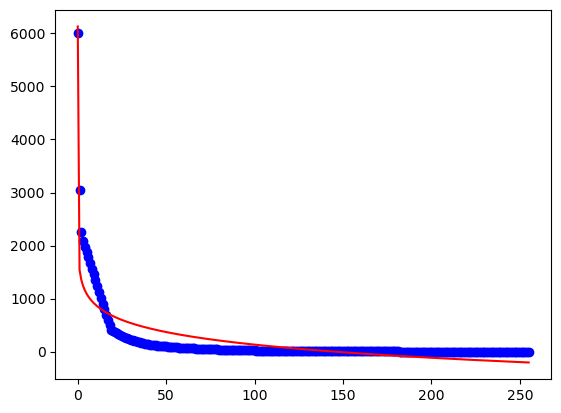

In [43]:
from scipy.optimize import curve_fit

def power_law(x, m, c, c0):
    return c0 + c * np.power(x, m)

# Generate some sample data
x_data = np.arange(256)
y_data = by_max

# Fit the model to the data
popt, pcov = curve_fit(power_law, x_data, y_data)

# popt contains the optimized values for the parameters (a and t)
m_opt, c_opt, c0_opt = popt

print("Optimized parameters:")
print("m =", m_opt)
print("c =", c_opt)
print("c0 =", c0_opt)

plt.plot(x_data, y_data, "bo", label="Sample Data")
plt.plot(x_data, power_law(x_data, m_opt, c_opt, c0_opt), "r-", label="Fitted Curve")

Optimized parameters:
m = 0.03406910120047442
c = 5091.982446967263
c0 = -6031.606664721259


C:\Users\user\AppData\Local\Temp\ipykernel_10404\580234267.py:4: RuntimeWarning: divide by zero encountered in power
  return c0 + c * np.power(x, m)


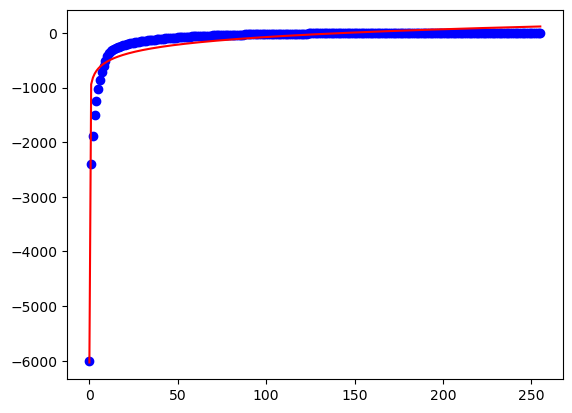

In [44]:
from scipy.optimize import curve_fit

def power_law(x, m, c, c0):
    return c0 + c * np.power(x, m)

# Generate some sample data
x_data = np.arange(256)
y_data = by_min

# Fit the model to the data
popt, pcov = curve_fit(power_law, x_data, y_data)

# popt contains the optimized values for the parameters (a and t)
m_opt, c_opt, c0_opt = popt

print("Optimized parameters:")
print("m =", m_opt)
print("c =", c_opt)
print("c0 =", c0_opt)

plt.plot(x_data, y_data, "bo", label="Sample Data")
plt.plot(x_data, power_law(x_data, m_opt, c_opt, c0_opt), "r-", label="Fitted Curve")

Optimized parameters:
m = 0.0631536326467334
c = 4574.0728337656265
c0 = -6247.429227523095


C:\Users\user\AppData\Local\Temp\ipykernel_10404\1269206610.py:4: RuntimeWarning: divide by zero encountered in power
  return c0 + c * np.power(x, m)


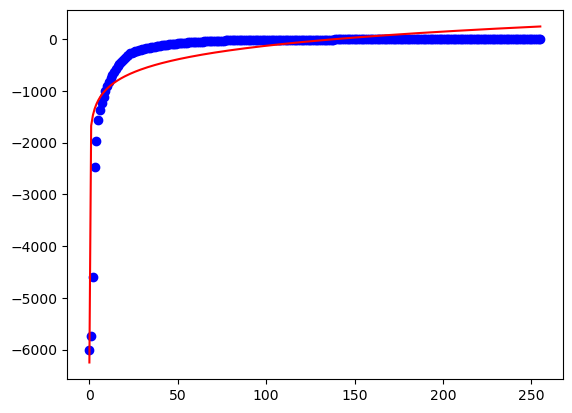

In [45]:
from scipy.optimize import curve_fit

def power_law(x, m, c, c0):
    return c0 + c * np.power(x, m)

# Generate some sample data
x_data = np.arange(256)
y_data = bz_min

# Fit the model to the data
popt, pcov = curve_fit(power_law, x_data, y_data)

# popt contains the optimized values for the parameters (a and t)
m_opt, c_opt, c0_opt = popt

print("Optimized parameters:")
print("m =", m_opt)
print("c =", c_opt)
print("c0 =", c0_opt)

plt.plot(x_data, y_data, "bo", label="Sample Data")
plt.plot(x_data, power_law(x_data, m_opt, c_opt, c0_opt), "r-", label="Fitted Curve")

Optimized parameters:
m = 0.11014022009324255
c = -2121.2864482947366
c0 = 3698.2853409131585


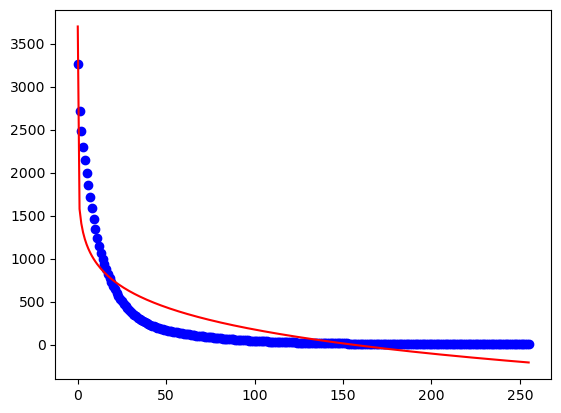

In [46]:
from scipy.optimize import curve_fit

def power_law(x, m, c, c0):
    return c0 + c * np.power(x, m)

# Generate some sample data
x_data = np.arange(256)
y_data = bz_max

# Fit the model to the data
popt, pcov = curve_fit(power_law, x_data, y_data)

# popt contains the optimized values for the parameters (a and t)
m_opt, c_opt, c0_opt = popt

print("Optimized parameters:")
print("m =", m_opt)
print("c =", c_opt)
print("c0 =", c0_opt)

plt.plot(x_data, y_data, "bo", label="Sample Data")
plt.plot(x_data, power_law(x_data, m_opt, c_opt, c0_opt), "r-", label="Fitted Curve")

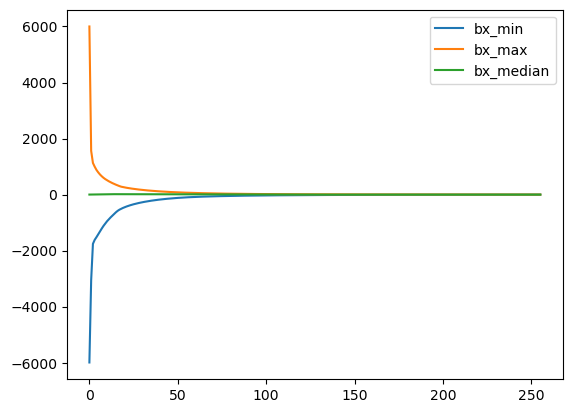

In [26]:
plt.plot(bx_min, label='bx_min')
plt.plot(bx_max, label='bx_max')
plt.plot(bx_median, label='bx_median')
plt.legend()
plt.show()

[]

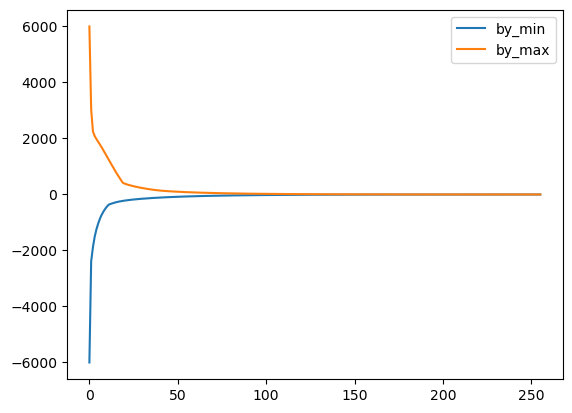

In [19]:
plt.plot(z, by_min, label='by_min')
plt.plot(z, by_max, label='by_max')
plt.legend()
plt.plot()

[]

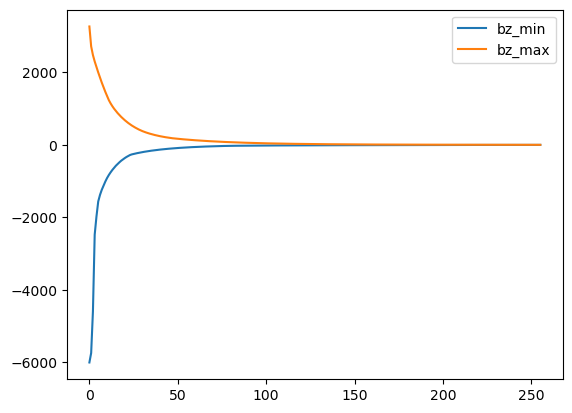

In [20]:
plt.plot(z, bz_min, label='bz_min')
plt.plot(z, bz_max, label='bz_max')
plt.legend()
plt.plot()